In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [78]:
dados = pd.read_excel('/content/MockUp _ Planilha Main.xlsx')

# **Análise exploratória de nossos dados**

In [79]:
dados

,Cidade,Estudante,Ano escolar,Turma,Faixa
0,Cidade 1,Estudante 1,6º ano,TM01,Amarelo
1,Cidade 1,Estudante 2,6º ano,TM01,Amarelo
2,Cidade 1,Estudante 3,6º ano,TM01,Amarelo
3,Cidade 1,Estudante 4,6º ano,TM01,Amarelo
4,Cidade 1,Estudante 5,6º ano,TM01,Amarelo
...,...,...,...,...,...
1723,Cidade 5,Estudante 1724,7º ano,TR10,Branco 2
1724,Cidade 5,Estudante 1725,7º ano,TR10,Branco 2
1725,Cidade 5,Estudante 1726,7º ano,TR10,Branco 2
1726,Cidade 5,Estudante 1727,7º ano,TR10,Branco 2


In [80]:
dados.tail()

,Cidade,Estudante,Ano escolar,Turma,Faixa
1723,Cidade 5,Estudante 1724,7º ano,TR10,Branco 2
1724,Cidade 5,Estudante 1725,7º ano,TR10,Branco 2
1725,Cidade 5,Estudante 1726,7º ano,TR10,Branco 2
1726,Cidade 5,Estudante 1727,7º ano,TR10,Branco 2
1727,Cidade 5,Estudante 1728,7º ano,TR10,Branco 2


In [81]:
dados.shape

(1728, 5)

In [82]:
dados.isnull().sum()

,0
Cidade,0
Estudante,0
Ano escolar,0
Turma,0
Faixa,0


In [83]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cidade       1728 non-null   object
 1   Estudante    1728 non-null   object
 2   Ano escolar  1728 non-null   object
 3   Turma        1728 non-null   object
 4   Faixa        1728 non-null   object
dtypes: object(5)
memory usage: 67.6+ KB


In [84]:
dados.describe()

,Cidade,Estudante,Ano escolar,Turma,Faixa
count,1728,1728,1728,1728,1728
unique,5,1728,4,47,5
top,Cidade 4,Estudante 1712,9º ano,TR07,Branco 1
freq,670,1,635,97,589


## Transformando nossa base de dados em binária(colunas Anos escolar e Faixa), nossos dados são tipos STRINGS(caracteres)

In [85]:
# 1. Mapeando 'Ano escolar' para inteiros
mapeamento_ano = {'6º ano': 0, '7º ano': 1, '8º ano': 2, '9º ano': 3}
dados['Ano escolar'] = dados['Ano escolar'].map(mapeamento_ano)

# 2. Mapear 'Faixa' para inteiros (ordem binária simples, ex.: Amarelo=0, Azul=1, Branco 1=2, Branco 2=3, Preto=4)
mapeamento_faixa = {'Amarelo': 0, 'Azul': 1, 'Branco 1': 2, 'Branco 2': 3, 'Preto': 4}
dados['Faixa'] = dados['Faixa'].map(mapeamento_faixa)

# 3. Verificando o tipos após a transformação
print(dados.dtypes)

# 4. Ordenando o DataFrame pelo 'Ano escolar'
dados_ordenados = dados.sort_values(by='Ano escolar')

dados['Ano escolar_binario'] = dados['Ano escolar'].apply(lambda x: 0 if x in [0, 1] else 1)

# Exibir o resultado
print(dados_ordenados.head())

Cidade         object
Estudante      object
Ano escolar     int64
Turma          object
Faixa           int64
dtype: object
       Cidade      Estudante  Ano escolar Turma  Faixa
32   Cidade 1   Estudante 33            0  TM02      0
33   Cidade 1   Estudante 34            0  TM02      0
34   Cidade 1   Estudante 35            0  TM02      0
45   Cidade 1   Estudante 46            0  TM02      0
544  Cidade 2  Estudante 545            0  TM19      3


<ipython-input-86-684294867>:14: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



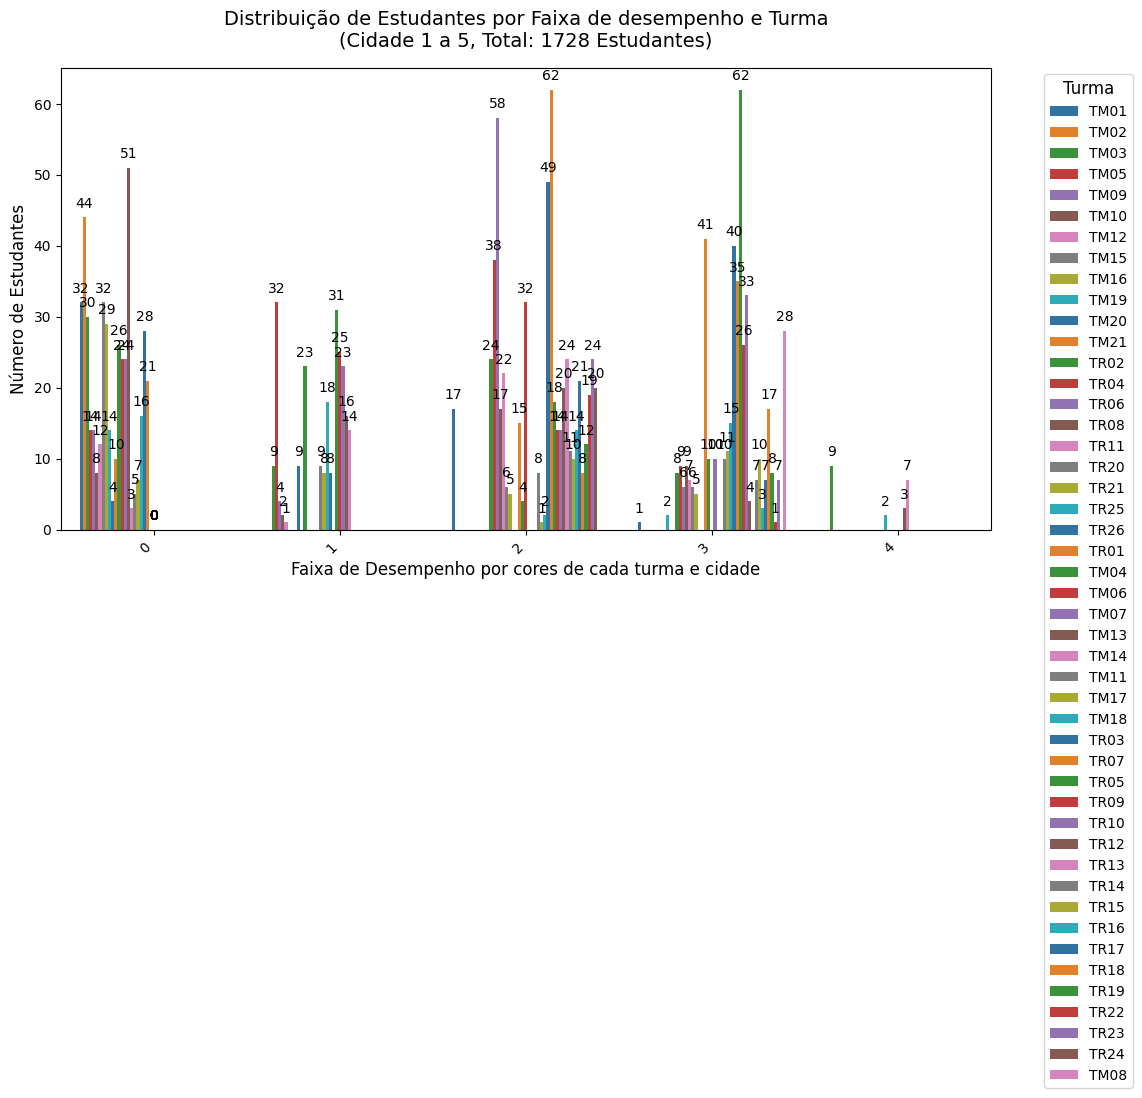

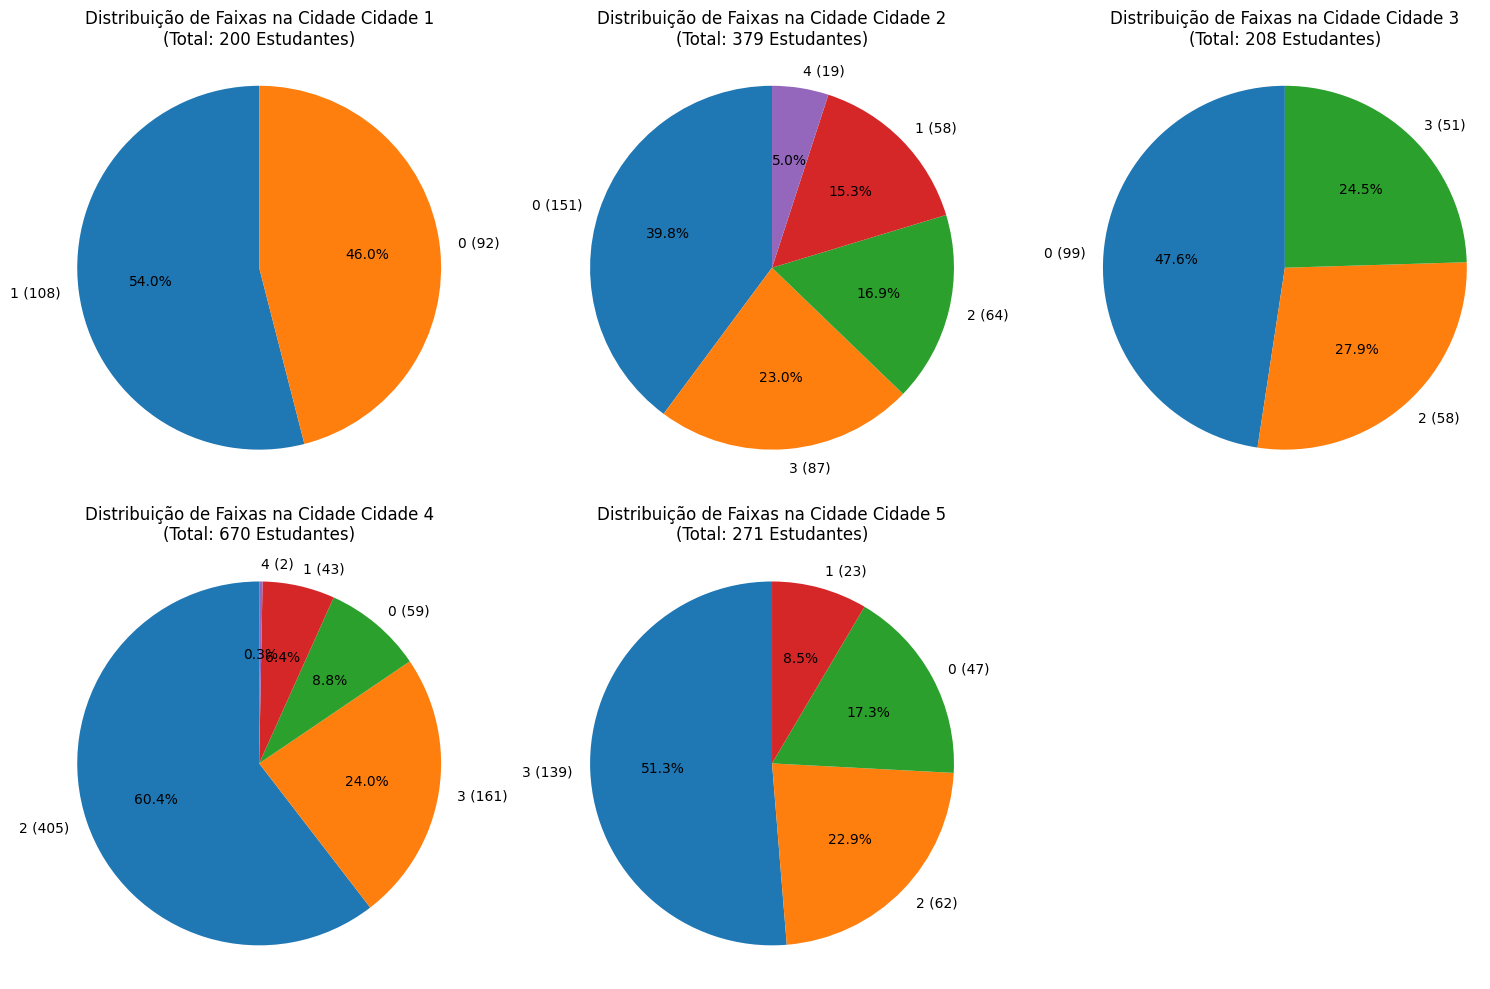

In [86]:
# Gráfico comparação entre faixas de estudantes e turmas
plt.figure(figsize=(12, 6))
ax1 = sns.countplot(data=dados, x='Faixa', hue='Turma', palette='tab10')
plt.title('Distribuição de Estudantes por Faixa de desempenho e Turma\n(Cidade 1 a 5, Total: 1728 Estudantes)', fontsize=14, pad=15)
plt.xlabel('Faixa de Desempenho por cores de cada turma e cidade', fontsize=12)
plt.ylabel('Número de Estudantes', fontsize=12)
plt.legend(title='Turma', title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Gráfico de Pizza: Distribuição por faixa e ano escolar por cidade
plt.figure(figsize=(15, 10))
for i, cidade in enumerate(dados['Cidade'].unique(), 1):
    cidade_data = dados[dados['Cidade'] == cidade]
    plt.subplot(2, 3, i)
    faixa_counts = cidade_data['Faixa'].value_counts()
    plt.pie(faixa_counts, labels=[f'{idx} ({count})' for idx, count in zip(faixa_counts.index, faixa_counts)],
            autopct='%1.1f%%', startangle=90, colors=sns.color_palette('tab10', len(faixa_counts)))
    plt.title(f'Distribuição de Faixas na Cidade {cidade}\n(Total: {len(cidade_data)} Estudantes)', fontsize=12)
    plt.axis('equal')
plt.tight_layout()
plt.show()



In [87]:
# Agrupando dados por Turma, Ano escolar e contar a quantidade de pessoas
relacao_turma_serie = dados.groupby(['Turma', 'Ano escolar']).size().reset_index(name='Quantidade de Pessoas')

fig = px.bar(relacao_turma_serie, x='Turma', y='Quantidade de Pessoas', color='Ano escolar',
             title='Relação entre Turmas, Séries e Quantidade de Pessoas',
             labels={'Turma': 'Turma', 'Quantidade de Pessoas': 'Número de Estudantes', 'Ano escolar': 'Série (0=6º, 1=7º, 2=8º, 3=9º)'},
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_layout(
    xaxis={'tickangle': 45},
    legend_title_text='Série',
    bargap=0.2,
    title_x=0.5
)
fig.show()

print("Resumo da Relação entre Turmas, Séries e Quantidade de Pessoas:")
print(relacao_turma_serie)

Resumo da Relação entre Turmas, Séries e Quantidade de Pessoas:
    Turma  Ano escolar  Quantidade de Pessoas
0    TM01            0                     12
1    TM01            1                     25
2    TM01            2                      8
3    TM01            3                      5
4    TM02            0                     10
..    ...          ...                    ...
111  TR25            0                      3
112  TR25            2                      6
113  TR25            3                     27
114  TR26            2                     20
115  TR26            3                     16

[116 rows x 3 columns]
